## Load the dataset

In [1]:
import pandas as pd
df=pd.read_excel('yahoo_data.xlsx')

## Preprocessing the dataset

In [2]:
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1258 non-null   object 
 1   Open         1258 non-null   float64
 2   High         1258 non-null   float64
 3   Low          1258 non-null   float64
 4   Close*       1258 non-null   float64
 5   Adj Close**  1258 non-null   float64
 6   Volume       1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [4]:
df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [8]:
df.sample(10)

,Date,Open,High,Low,Close*,Adj Close**,Volume,Day,Month,Year
398,2021-09-28,34747.70,34798.21,34254.65,34299.99,34299.99,379020000,28,9,2021
401,2021-09-23,34296.30,34879.78,34296.30,34764.82,34764.82,283890000,23,9,2021
598,2020-12-10,30032.55,30063.87,29876.82,29999.26,29999.26,325550000,10,12,2020
32,2023-03-14,32055.29,32306.59,31805.40,32155.40,32155.40,391760000,14,3,2023
384,2021-10-18,35221.02,35327.57,35035.94,35258.61,35258.61,312640000,18,10,2021
595,2020-12-15,29919.09,30243.26,29894.95,30199.31,30199.31,417770000,15,12,2020
1217,2018-06-27,24303.11,24569.02,24115.82,24117.59,24117.59,313790000,27,6,2018
68,2023-01-20,33073.46,33381.95,32948.93,33375.49,33375.49,367330000,20,1,2023
714,2020-06-26,25641.69,25641.69,24971.03,25015.55,25015.55,640860000,26,6,2020
690,2020-07-31,26409.33,26440.02,26013.59,26428.32,26428.32,488050000,31,7,2020


In [10]:
df=df.drop(['Date'],axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         1258 non-null   float64
 1   High         1258 non-null   float64
 2   Low          1258 non-null   float64
 3   Close*       1258 non-null   float64
 4   Adj Close**  1258 non-null   float64
 5   Volume       1258 non-null   int64  
 6   Day          1258 non-null   int32  
 7   Month        1258 non-null   int32  
 8   Year         1258 non-null   int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 73.8 KB


In [12]:
df.columns

Index(['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume', 'Day',
       'Month', 'Year'],
      dtype='object')

## Visualizing the data

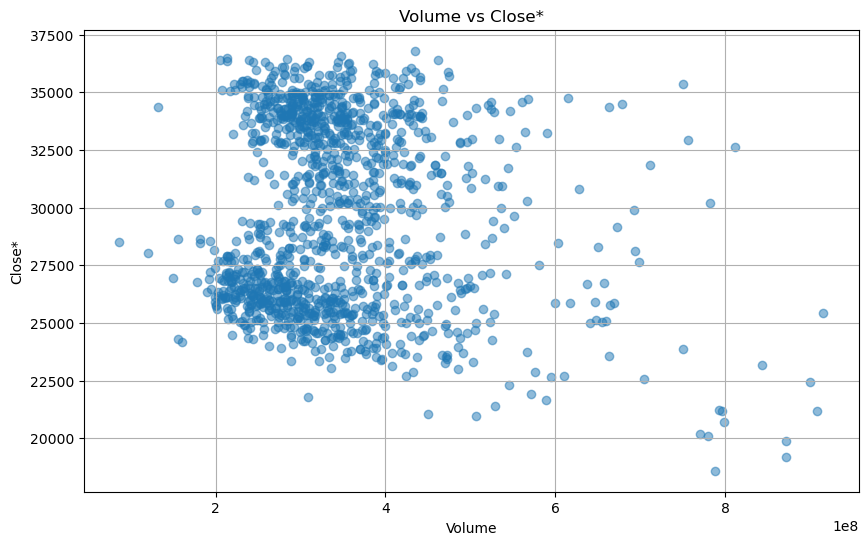

In [14]:

# Scatter plot of Volume against Close*
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], df['Close*'], alpha=0.5)
plt.xlabel('Volume')
plt.ylabel('Close*')
plt.title('Volume vs Close*')
plt.grid(True)
plt.show()

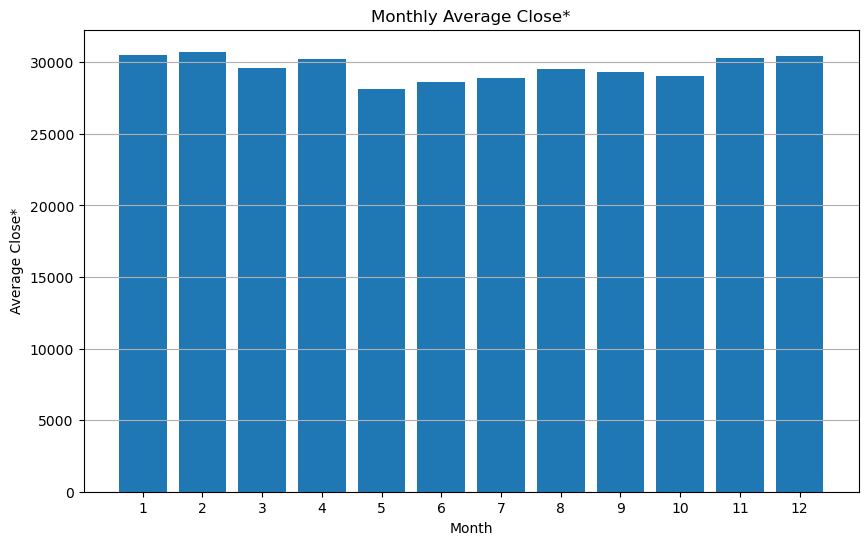

In [15]:
# Bar plot of monthly average Close*
monthly_avg_close = df.groupby('Month')['Close*'].mean()
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_close.index, monthly_avg_close.values)
plt.xlabel('Month')
plt.ylabel('Average Close*')
plt.title('Monthly Average Close*')
plt.xticks(monthly_avg_close.index)
plt.grid(axis='y')
plt.show()

## Training the dataset

In [27]:
X=df.drop(['Day','Month','Year','Close*'],axis=1)
Y=df['Close*']

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
import pickle

# Saving the model
model = scaler
filename = 'scaler_standard.joblib'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [54]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [55]:
lr_pred = lr_model.predict(X_test_scaled)

In [56]:
mse_lr = mean_squared_error(y_test, lr_pred)
print(f"Linear Regression MSE: {mse_lr}")

Linear Regression MSE: 6.407367284537738e-24


In [58]:
r2_lr = r2_score(y_test, lr_pred)
print(f"Linear Regression R2 score: {r2_lr}")

Linear Regression R2 score: 1.0


In [59]:
from sklearn.svm import SVR

In [68]:
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [69]:
svm_pred = svm_model.predict(X_test_scaled)
r2_svm = r2_score(y_test, svm_pred)
print(f"SVM R2 score: {r2_svm}")

SVM R2 score: 0.98461586937848


In [86]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
# Split data into training and testing se
# Define base estimator (weak learner)
base_estimator = DecisionTreeRegressor(max_depth=3)

# AdaBoost model
adaboost_model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, random_state=42)
adaboost_model.fit(X_train_scaled, y_train)

# Predictions
adaboost_pred = adaboost_model.predict(X_test_scaled)

# Calculate R2 score
r2_adaboost = r2_score(y_test, adaboost_pred)

print(f"AdaBoost R2 score: {r2_adaboost}")

mse_adaboost = mean_squared_error(y_test, adaboost_pred)
print(f"AdaBoost MSE: {mse_adaboost}")

AdaBoost R2 score: 0.9955308168605831
AdaBoost MSE: 72485.06500849065


C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [85]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
rf_pred = rf_model.predict(X_test_scaled)

# Calculate R2 score
r2_rf = r2_score(y_test, rf_pred)

print(f"Random Forest R2 score: {r2_rf}")

mse = mean_squared_error(y_test, rf_pred)
print(f" Random ForestMSE: {mse}")

Random Forest R2 score: 0.9997747390888094
 Random ForestMSE: 3653.4756536413074


In [90]:
import pickle

# Saving the model
model = lr_model
filename = 'lr_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [93]:
min_values = df[['Open','High','Low','Adj Close**','Volume'	]].min()

print("Minimum values:")
print(min_values)

Minimum values:
Open              19028.36
High              19121.01
Low               18213.65
Adj Close**       18591.93
Volume         86150000.00
dtype: float64
